<a href="https://colab.research.google.com/github/LaiTriMinh/project/blob/main/do_an_viet_nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [12]:
%cd /content/drive/MyDrive/do an

/content/drive/MyDrive/do an


In [13]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/do an/train',target_size=(150,150), batch_size=32, class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/do an/test',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 462 images belonging to 9 classes.
Found 304 images belonging to 9 classes.


In [14]:
training_set.class_indices

{'Bánh canh': 0,
 'Bánh chưng': 1,
 'Bánh khọt': 2,
 'Bánh mì': 3,
 'Bò kho': 4,
 'Bún mắm': 5,
 'Cơm tấm': 6,
 'Gỏi cuối': 7,
 'Phở': 8}

In [15]:
test_set.class_indices

{'Bánh canh': 0,
 'Bánh chưng': 1,
 'Bánh khọt': 2,
 'Bánh mì': 3,
 'Bò kho': 4,
 'Bún mắm': 5,
 'Cơm tấm': 6,
 'Gỏi cuối': 7,
 'Phở': 8}

In [16]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=100,verbose=1)

Epoch 1/100
15/15 [==============================] - 300s 19s/step - loss: 3.2114 - accuracy: 0.1970
Epoch 2/100
15/15 [==============================] - 9s 622ms/step - loss: 2.1153 - accuracy: 0.2143
Epoch 3/100
15/15 [==============================] - 9s 611ms/step - loss: 1.8941 - accuracy: 0.2771
Epoch 4/100
15/15 [==============================] - 9s 619ms/step - loss: 1.7699 - accuracy: 0.3355
Epoch 5/100
15/15 [==============================] - 9s 608ms/step - loss: 1.6604 - accuracy: 0.3788
Epoch 6/100
15/15 [==============================] - 9s 606ms/step - loss: 1.4273 - accuracy: 0.4784
Epoch 7/100
15/15 [==============================] - 9s 609ms/step - loss: 1.4275 - accuracy: 0.5130
Epoch 8/100
15/15 [==============================] - 9s 595ms/step - loss: 1.2449 - accuracy: 0.5563
Epoch 9/100
15/15 [==============================] - 9s 604ms/step - loss: 1.1440 - accuracy: 0.5974
Epoch 10/100
15/15 [==============================] - 9s 579ms/step - loss: 1.0537 - accura

In [18]:
model.save('doan.h5')

In [19]:
model_doan = load_model('doan.h5')

In [20]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.019528420642018318
Train Accuracy 0.9956709742546082


1/1 [==============================] - 0s 14ms/step
Đây món: Phở


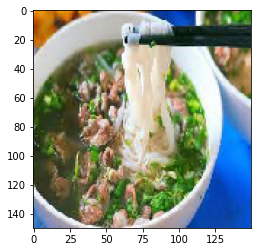

In [26]:
img = load_img('/content/pho.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_doan.predict(img)
class_doan=['Bánh canh',
 'Bánh chưng',
 'Bánh khọt',
 'Bánh mi',
 'Bò kho',
 'Bún mắm',
 'Cơm tấm',
 'Gỏi cuối',
 'Phở']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây món:", class_doan[a])